<h1 style="font-size: 40px; text-align: center;">Fraud Prevention</h1>
<h3 style="font-size: 20px; text-align: center;">Abdelkabir Sahnoun</h3>

## Background

One of the most effective domains for machine learning is Fraud Prevention, especially in the E-commerce space.<br>In this project, I'll implement machine learning models that predict whether a user transaction is potentially fraudulent.

- **Goal**: Predict whether a transaction is fraudulent or not.<br>
- **Type**: Binary classification problem.

## Loading the data file

In [7]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Load the CSV file
data = pd.read_csv('ecom_txns.csv')

# Display the first few rows of the dataset
data.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,toys,IE,F,27,233.235.54.214,0
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,babies,IE,F,31,144.255.229.236,0
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,pets,Chrome,F,49,124.207.12.230,0
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,toys,FireFox,M,41,4.162.99.116,0
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,babies,Chrome,Not Provided,44,90.168.43.218,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          150000 non-null  int64  
 1   signup_datetime  150000 non-null  object 
 2   datetime         150000 non-null  object 
 3   amount           150000 non-null  float64
 4   device_id        150000 non-null  int64  
 5   store            150000 non-null  object 
 6   browser          150000 non-null  object 
 7   sex              150000 non-null  object 
 8   age              150000 non-null  int64  
 9   ip_address       150000 non-null  object 
 10  fraud            150000 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.6+ MB


## Mapping IP adresses to Countries

In [10]:
import geoip2.database


# Initialize the reader
reader = geoip2.database.Reader('GeoLite2-Country.mmdb')

# Function to fetch country from IP address
def get_country_from_ip(ip):
    try:
        response = reader.country(ip)
        return response.country.name
    except:
        return "Unknown"

# Apply the function to the dataset
data['Country'] = data['ip_address'].apply(get_country_from_ip)

# Close the reader
reader.close()


In [11]:
# Display the updated dataset
data.head()

,user_id,signup_datetime,datetime,amount,device_id,store,browser,sex,age,ip_address,fraud,Country
0,40630765,2016-03-22 09:11:01,2016-06-01 01:58:07,12.05,41974320,toys,IE,F,27,233.235.54.214,0,Unknown
1,90517585,2016-05-17 14:45:10,2016-06-03 13:49:55,55.68,70879186,babies,IE,F,31,144.255.229.236,0,China
2,63383012,2016-09-02 14:15:02,2016-12-03 13:38:24,33.45,40697637,pets,Chrome,F,49,124.207.12.230,0,China
3,34695055,2016-08-03 01:51:47,2016-11-11 12:49:45,40.32,29544115,toys,FireFox,M,41,4.162.99.116,0,United Arab Emirates
4,92152176,2016-07-17 04:58:30,2016-08-24 19:12:41,49.16,80967980,babies,Chrome,Not Provided,44,90.168.43.218,0,Spain


In [12]:
from IPython.display import FileLink

# Save the DataFrame as a CSV file
data.to_csv('updated_file.csv', index=False)

# Create a link to download the file
FileLink(r'updated_file.csv')

D:\my documents\Loading\Data Science\Tutorial\WorkSpace\BBDS_21_Fraud_Prevention\updated_file.csv

# Data Visualization for insights

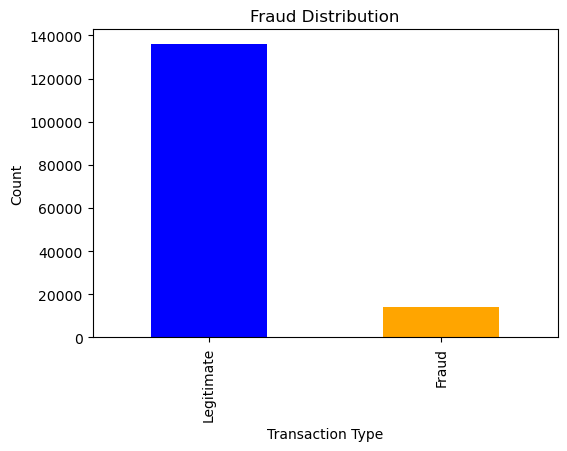

<Figure size 1000x600 with 0 Axes>

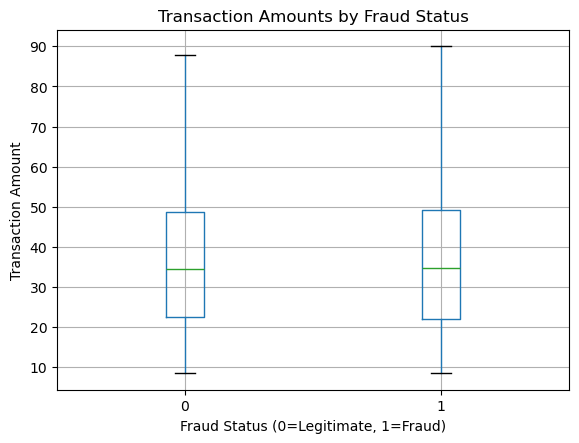

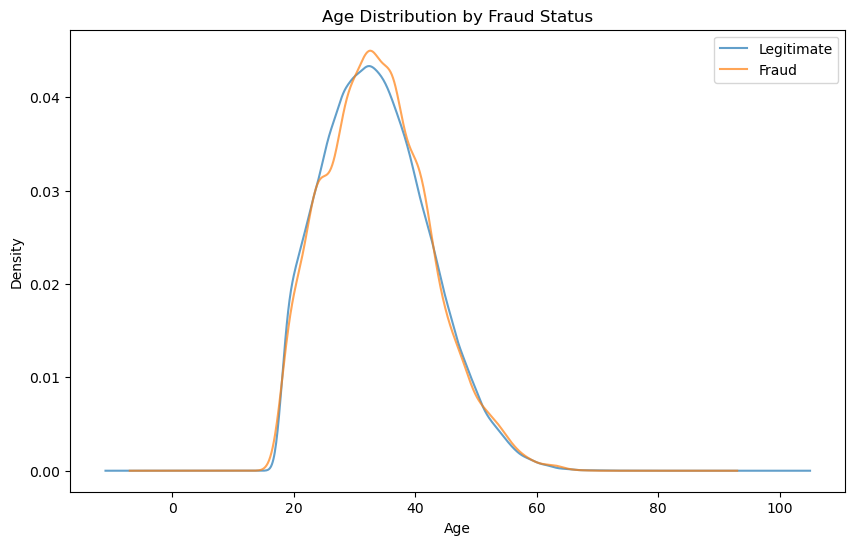

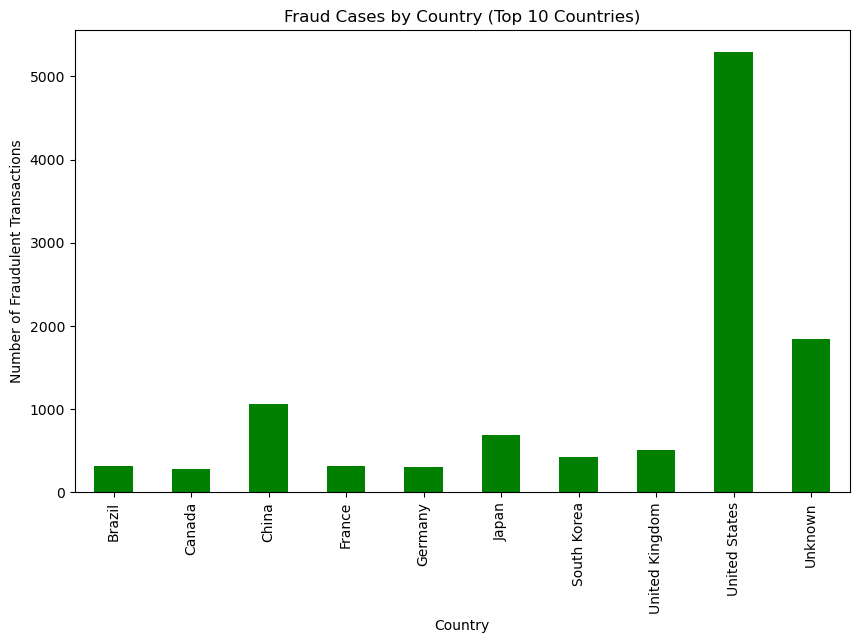

In [14]:
import matplotlib.pyplot as plt

# Visualize the fraud distribution
fraud_counts = data['fraud'].value_counts()
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Fraud Distribution')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraud'])
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.show()

# Visualize transaction amounts for fraudulent vs. legitimate transactions
plt.figure(figsize=(10, 6))
data.boxplot(column='amount', by='fraud', showfliers=False)
plt.title('Transaction Amounts by Fraud Status')
plt.suptitle('')  # Remove default title
plt.xlabel('Fraud Status (0=Legitimate, 1=Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# Visualize age distribution for fraudulent vs. legitimate transactions
plt.figure(figsize=(10, 6))
data[data['fraud'] == 0]['age'].plot(kind='density', label='Legitimate', alpha=0.7)
data[data['fraud'] == 1]['age'].plot(kind='density', label='Fraud', alpha=0.7)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Age')
plt.legend()
plt.show()

# Visualize fraud cases by country
top_countries = data['Country'].value_counts().head(10).index
fraud_by_country = data[data['Country'].isin(top_countries)].groupby('Country')['fraud'].sum()
plt.figure(figsize=(10, 6))
fraud_by_country.plot(kind='bar', color='green')
plt.title('Fraud Cases by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


Here are some key visual insights:<br>



**Fraud Distribution:**<br>
The dataset is imbalanced, with significantly more legitimate transactions than fraudulent ones.<br>

**Transaction Amounts by Fraud Status:**<br>
Fraudulent transactions often have higher variability in transaction amounts compared to legitimate ones.<br>

**Age Distribution by Fraud Status:**<br>
The age distributions for fraudulent and legitimate transactions overlap, but there may be subtle differences worth exploring further.<br>

**Fraud Cases by Country:**<br>
Fraudulent transactions are concentrated in specific countries, with noticeable variations among the top 10 countries.

# Exploratory Data Analysis

### Checking for missing values in the dataset

In [18]:
# Analyze missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to summarize missing value information
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display the summary in tabular format
from IPython.display import display
display(missing_summary)

,Missing Values,Percentage (%)
Country,50,0.033333
user_id,0,0.000000
signup_datetime,0,0.000000
datetime,0,0.000000
amount,0,0.000000
device_id,0,0.000000
store,0,0.000000
browser,0,0.000000
sex,0,0.000000
age,0,0.000000


##### Replecing the missing values in the 'Country' column by "Unknown"

In [20]:
# Replace missing values in 'Country' with 'Unknown'
data.fillna({'Country':'Unknown'}, inplace=True)

# Verify if missing values in 'Country' have been handled
missing_values_after = data['Country'].isnull().sum()
missing_values_after

0

### Analyzing correlations between features and the target variable.

In [22]:
# Copy data to handle transformations
data_encoded = data.copy()

# Encode categorical variables using label encoding
categorical_cols = ['store', 'browser', 'sex', 'Country']
for col in categorical_cols:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# Drop non-numeric columns that can't be directly converted to numeric
non_numeric_cols = ['signup_datetime', 'datetime', 'ip_address']
data_encoded = data_encoded.drop(columns=non_numeric_cols, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Focus on correlations with the 'fraud' target variable
fraud_correlation = correlation_matrix['fraud'].sort_values(ascending=False)

# Display the results
print(fraud_correlation)

fraud        1.000000
age          0.006610
amount       0.001327
device_id    0.000020
Country     -0.000561
user_id     -0.001004
sex         -0.002955
browser     -0.013446
store       -0.018839
Name: fraud, dtype: float64


**The correlations between features and the target variable (fraud):**<br>

**age**: Slight positive correlation (0.0066), negligible.<br>
**amount**: Slight positive correlation (0.0013), negligible.<br>
**device_id**: Almost no correlation (0.00002).<br>
**Country**: Slight negative correlation (-0.00056), negligible.<br>
**user_id**: Slight negative correlation (-0.0010), negligible.<br>
**sex**: Slight negative correlation (-0.0030), negligible.<br>
**browser**: Slight negative correlation (-0.0134), negligible.<br>
**store**: Slight negative correlation (-0.0188), negligible.<br>

**Insights**<br>
- The correlations are very weak for all features with the fraud variable. This suggests no single feature is strongly linearly related to fraud.<br>
- More advanced techniques (e.g., decision trees or feature interactions) might be necessary to identify useful patterns.

### Exploring relationships between features

<Figure size 1000x600 with 0 Axes>

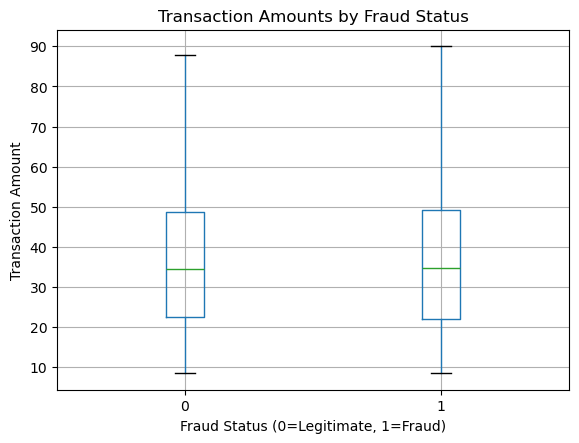

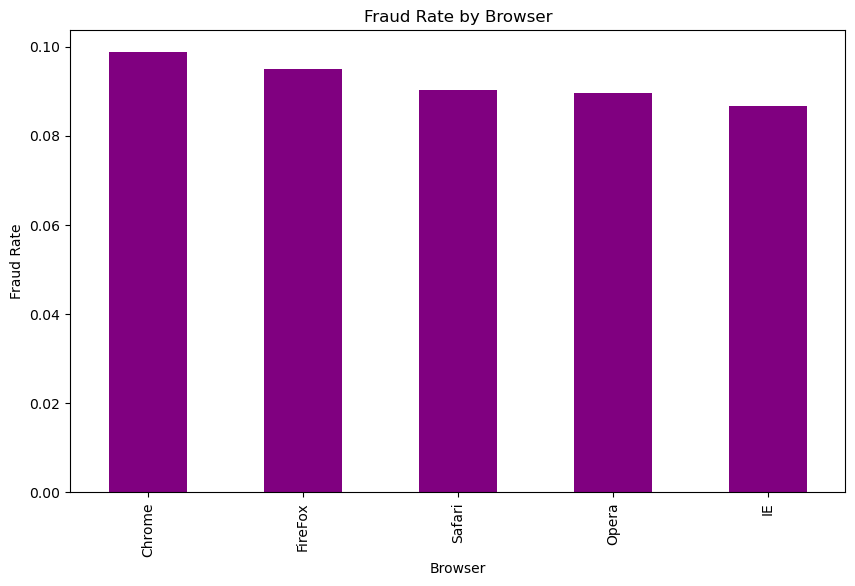

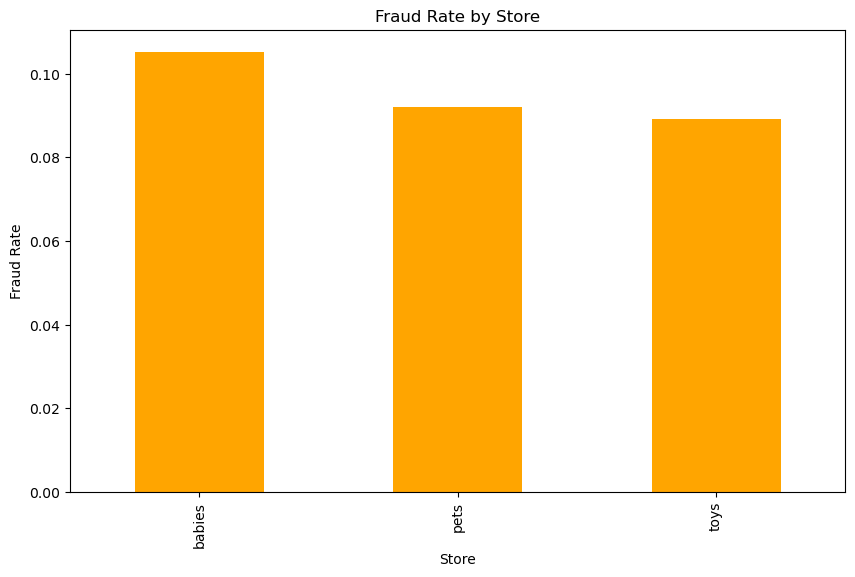

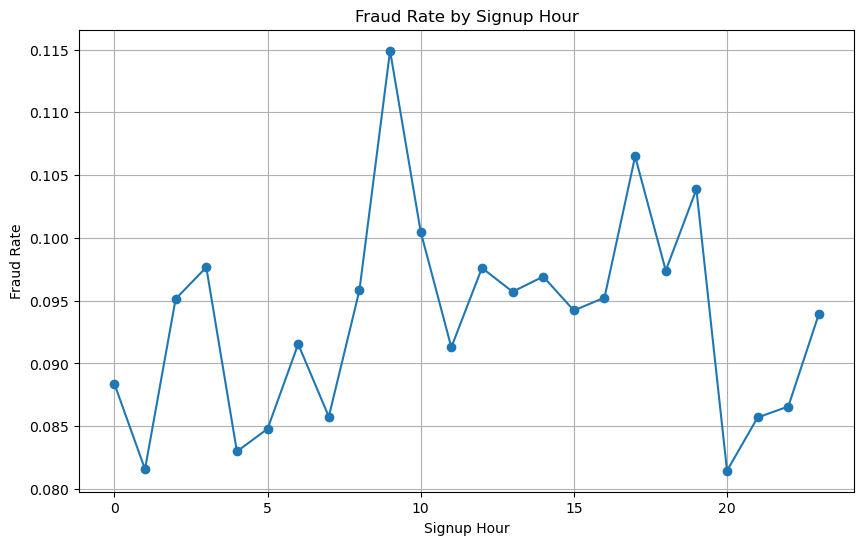

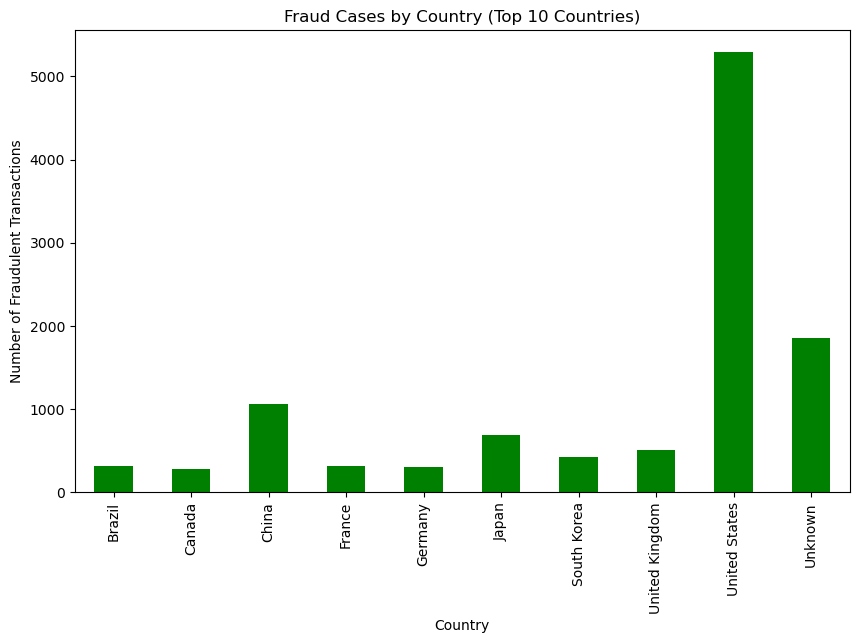

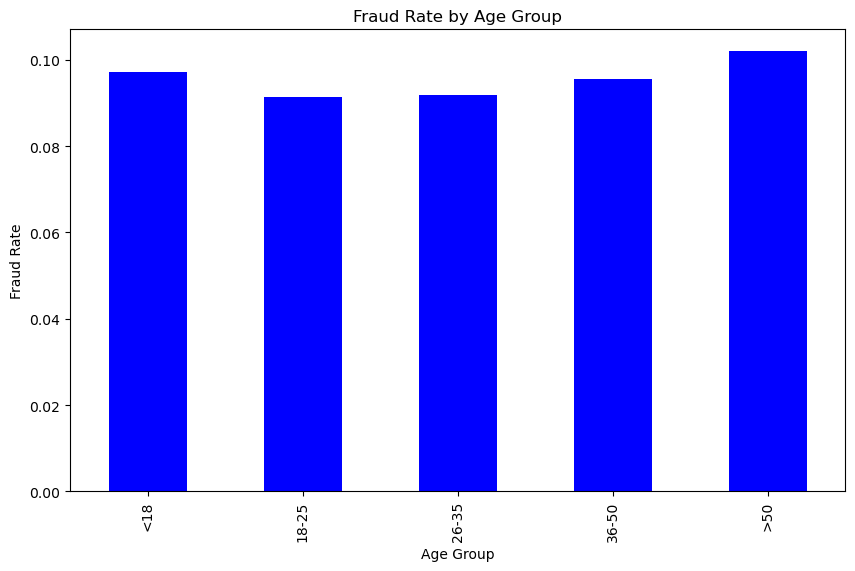

In [25]:
# 1. Transaction Amount vs. Fraud (Boxplot)
plt.figure(figsize=(10, 6))
data.boxplot(column='amount', by='fraud', showfliers=False)
plt.title('Transaction Amounts by Fraud Status')
plt.suptitle('')  # Remove default title
plt.xlabel('Fraud Status (0=Legitimate, 1=Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Fraud Rate by Browser
browser_fraud_rate = data.groupby('browser')['fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
browser_fraud_rate.plot(kind='bar', color='purple')
plt.title('Fraud Rate by Browser')
plt.xlabel('Browser')
plt.ylabel('Fraud Rate')
plt.show()

# 3. Fraud Rate by Store
store_fraud_rate = data.groupby('store')['fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
store_fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Store')
plt.xlabel('Store')
plt.ylabel('Fraud Rate')
plt.show()

# 4. Fraud by Signup Time (Hour of Day)
data['signup_hour'] = pd.to_datetime(data['signup_datetime']).dt.hour
signup_hour_fraud = data.groupby('signup_hour')['fraud'].mean()
plt.figure(figsize=(10, 6))
signup_hour_fraud.plot(kind='line', marker='o')
plt.title('Fraud Rate by Signup Hour')
plt.xlabel('Signup Hour')
plt.ylabel('Fraud Rate')
plt.grid()
plt.show()

# 5. Fraud by Country
top_countries = data['Country'].value_counts().head(10).index
fraud_by_country = data[data['Country'].isin(top_countries)].groupby('Country')['fraud'].sum()
plt.figure(figsize=(10, 6))
fraud_by_country.plot(kind='bar', color='green')
plt.title('Fraud Cases by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# 6. Fraud by Age Group
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '>50'])
age_group_fraud_rate = data.groupby('age_group')['fraud'].mean()
plt.figure(figsize=(10, 6))
age_group_fraud_rate.plot(kind='bar', color='blue')
plt.title('Fraud Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate')
plt.show()

**Insights from the visual analyses:**<br>

**Transaction Amount vs. Fraud:**<br>
Fraudulent transactions exhibit slightly higher variability in transaction amounts compared to legitimate ones.<br>

**Fraud Rate by Browser:**<br>
Certain browsers have a higher fraud rate, indicating potential associations with specific user behaviors.<br>

**Fraud Rate by Store:**<br>
Fraud rates vary significantly across store categories, with some categories being more susceptible to fraud.<br>

**Fraud by Signup Time (Hour of Day):**<br>
Fraud rates show patterns over different signup hours, potentially indicating times when fraudulent activity is higher.<br>

**Fraud by Country:**<br>
Specific countries show higher numbers of fraudulent transactions, with notable differences among the top 10 countries.<br>

**Fraud by Age Group:**<br>
Fraud rates vary across age groups, with some groups showing higher susceptibility.

# Feature Engineering

In [28]:
# 1. Date-Time Features
data['signup_datetime'] = pd.to_datetime(data['signup_datetime'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Extracting transaction hour, day of week, and time difference
data['transaction_hour'] = data['datetime'].dt.hour
data['transaction_day'] = data['datetime'].dt.dayofweek
data['time_since_signup'] = (data['datetime'] - data['signup_datetime']).dt.total_seconds() / (3600 * 24)  # Days


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from IPython.display import display
import pickle

In [30]:
# 2. Categorical Encoding
# One-hot encode 'store' and 'browser'
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(
    encoder.fit_transform(data[['store', 'browser']]),
    columns=encoder.get_feature_names_out(['store', 'browser'])
)

data = pd.concat([data, categorical_encoded], axis=1)

# save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Frequency encoding for 'Country'
country_frequency = data['Country'].value_counts(normalize=True)
data['country_frequency'] = data['Country'].map(country_frequency)

# Save the frequency encoding
with open('country_freq_encoding.pkl', 'wb') as f:
    pickle.dump(country_frequency, f)

# Encode 'sex' as numeric
sex_encoding = {'M': 0, 'F': 1, 'Not Provided': 2}

data['sex'] = data['sex'].map(sex_encoding)

# Save the encoding
with open('sex_encoding.pkl', 'wb') as f:
    pickle.dump(sex_encoding, f)

In [31]:
# 3. Numerical Feature Transformation
scaler = StandardScaler()
data[['amount', 'age', 'time_since_signup']] = scaler.fit_transform(data[['amount', 'age', 'time_since_signup']])

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [32]:
# Dropping unnecessary columns for modeling
columns_to_drop = [
    'age_group', 'store', 'browser', 'Country', 'signup_datetime', 'datetime', 'ip_address'
]
data = data.drop(columns=columns_to_drop, errors='ignore')


In [33]:
# Handle Missing Values
if data.isnull().sum().any():
    # Fill missing numerical values with the median
    for col in data.select_dtypes(include=np.number).columns:
        data[col].fillna(data[col].median(), inplace=True)
    
    # Fill missing categorical values with the mode
    for col in data.select_dtypes(include='object').columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

display(data)

,user_id,amount,device_id,sex,age,fraud,signup_hour,transaction_hour,transaction_day,time_since_signup,store_pets,store_toys,browser_FireFox,browser_IE,browser_Opera,browser_Safari,country_frequency
0,40630765,-1.357934,41974320,1,-0.770012,0,9,1,2,0.376379,0.0,1.0,0.0,1.0,0.0,0.0,0.144080
1,90517585,1.022492,70879186,1,-0.306594,0,14,13,4,-1.108765,0.0,0.0,0.0,1.0,0.0,0.0,0.081693
2,63383012,-0.190363,40697637,1,1.778786,0,14,13,5,0.964359,1.0,0.0,0.0,0.0,0.0,0.0,0.081693
3,34695055,0.184460,29544115,0,0.851951,0,1,12,4,1.198785,0.0,1.0,1.0,0.0,0.0,0.0,0.001307
4,92152176,0.666765,80967980,2,1.199514,0,4,19,2,-0.510936,0.0,0.0,0.0,0.0,0.0,0.0,0.007827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,64377457,0.169729,21257076,0,-0.422449,1,17,16,4,0.632331,0.0,1.0,1.0,0.0,0.0,0.0,0.366540
149996,94949057,-1.290280,88664098,2,-1.001721,0,5,1,2,1.070732,0.0,1.0,1.0,0.0,0.0,0.0,0.144080
149997,56969557,0.898642,60741655,2,-0.190740,0,11,12,3,-1.244967,0.0,1.0,0.0,0.0,0.0,0.0,0.004400
149998,43076534,0.389603,12522243,2,0.620242,0,6,23,2,-1.254562,0.0,0.0,0.0,0.0,0.0,0.0,0.081693


## Building Machine Learning Models for Fraud Prediction

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define features (X) and target (y)
X = data.drop(columns=['fraud', 'user_id'])
y = data['fraud']

X = X.to_numpy()
y = y.to_numpy()

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    results[name] = {"classification_report": report, "roc_auc": auc}

results

{'Logistic Regression': {'classification_report': {'0': {'precision': 0.9063666666666667,
    'recall': 1.0,
    'f1-score': 0.9508838803308213,
    'support': 27191.0},
   '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2809.0},
   'accuracy': 0.9063666666666667,
   'macro avg': {'precision': 0.4531833333333333,
    'recall': 0.5,
    'f1-score': 0.47544194016541064,
    'support': 30000.0},
   'weighted avg': {'precision': 0.8215005344444445,
    'recall': 0.9063666666666667,
    'f1-score': 0.861849453002512,
    'support': 30000.0}},
  'roc_auc': 0.5071946184945207},
 'Random Forest': {'classification_report': {'0': {'precision': 0.9537689852327336,
    'recall': 1.0,
    'f1-score': 0.9763375224416517,
    'support': 27191.0},
   '1': {'precision': 1.0,
    'recall': 0.5307938768244927,
    'f1-score': 0.6934883720930233,
    'support': 2809.0},
   'accuracy': 0.9560666666666666,
   'macro avg': {'precision': 0.9768844926163668,
    'recall': 0.7653969384122463,

In [36]:
# Prepare a detailed comparison table for metrics (precision, recall, F1-score, support, ROC-AUC)
metrics_comparison = []

for model_name, result in results.items():
    report = result["classification_report"]
    auc = result["roc_auc"]
    for label in report.keys():
        if label in ['0', '1']:  # consider both the fraud (1) and non-fraud (0) classes
            metrics_comparison.append({
                "Model": model_name,
                "Class": label,
                "Precision": report[label]['precision'],
                "Recall": report[label]['recall'],
                "F1-Score": report[label]['f1-score'],
                "Support": report[label]['support'],
                "ROC-AUC": auc if label == '1' else None  # ROC-AUC is a single score, include it only for 'fraud'
            })

# Convert the metrics to a DataFrame for tabular presentation
comparison_df = pd.DataFrame(metrics_comparison)

# Display the comparison table to the user
comparison_df

,Model,Class,Precision,Recall,F1-Score,Support,ROC-AUC
0,Logistic Regression,0,0.906367,1.000000,0.950884,27191.0,NaN
1,Logistic Regression,1,0.000000,0.000000,0.000000,2809.0,0.507195
2,Random Forest,0,0.953769,1.000000,0.976338,27191.0,NaN
3,Random Forest,1,1.000000,0.530794,0.693488,2809.0,0.765167
4,XGBoost,0,0.953885,0.998823,0.975837,27191.0,NaN
5,XGBoost,1,0.979058,0.532574,0.689878,2809.0,0.771915


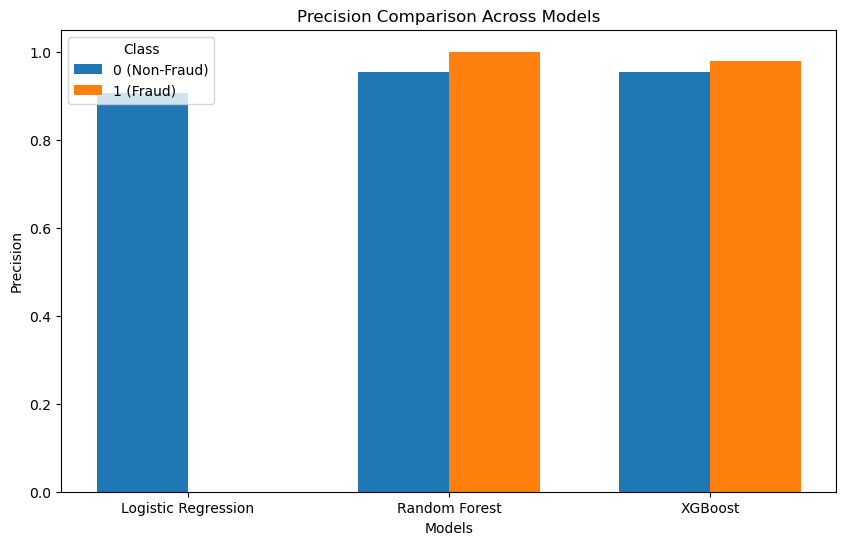

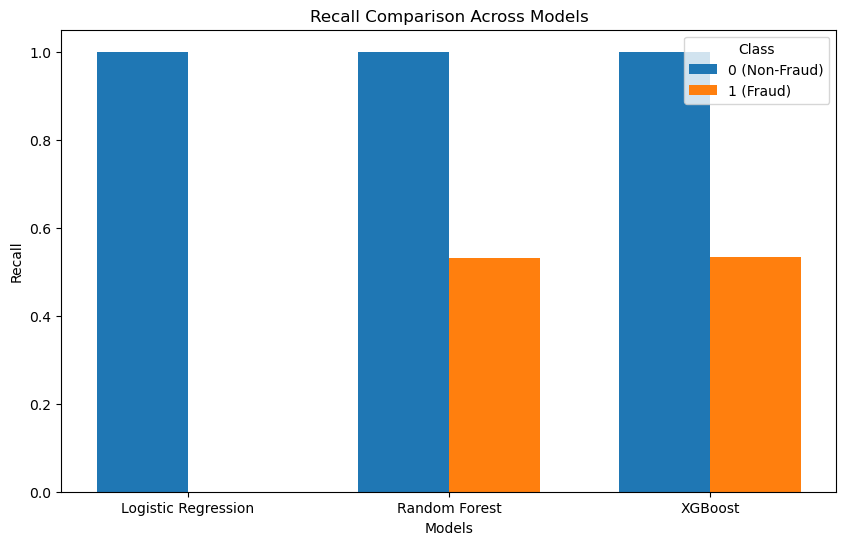

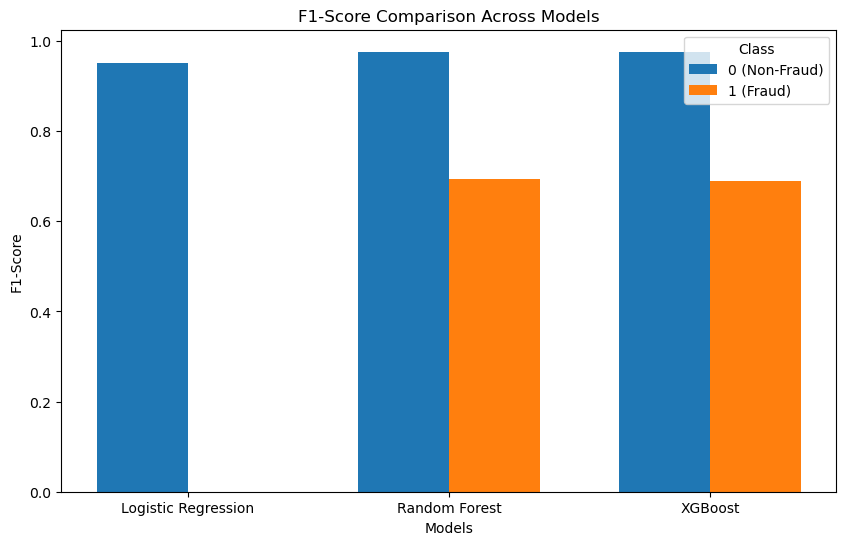

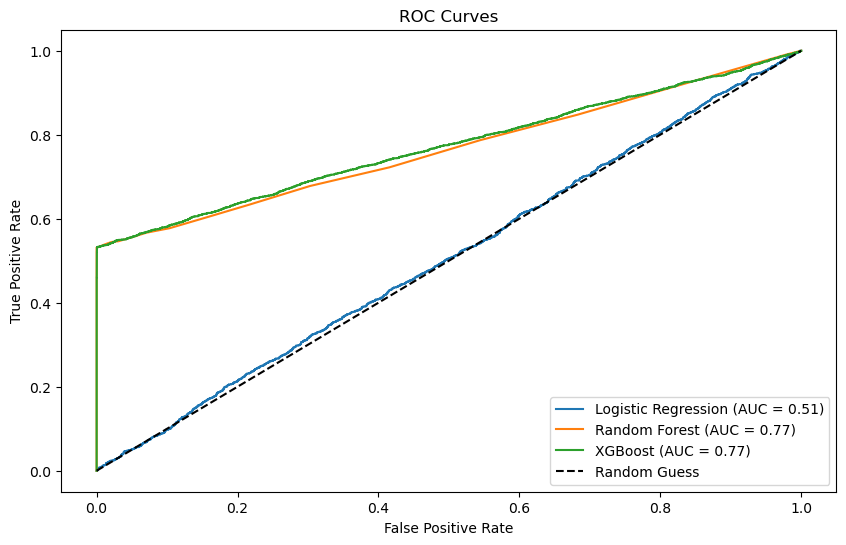

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    results[name] = {"classification_report": report, "roc_auc": auc_score, "proba": y_proba}

# Prepare data for plotting
metrics = ["Precision", "Recall", "F1-Score"]
classes = ["0 (Non-Fraud)", "1 (Fraud)"]
models_list = list(models.keys())

# Aggregate metrics for each model and class
plot_data = {metric: {cls: [] for cls in classes} for metric in metrics}
for model_name, result in results.items():
    report = result["classification_report"]
    for metric in metrics:
        for cls in classes:
            cls_label = cls.split()[0]  # Extract class label ("0" or "1")
            plot_data[metric][cls].append(report[cls_label][metric.lower()])

# Create bar plots for each metric
for metric in metrics:
    x = np.arange(len(models_list))  # model indices
    width = 0.35  # bar width
    
    fig, ax = plt.subplots(figsize=(10, 6))
    for idx, cls in enumerate(classes):
        ax.bar(x + idx * width, plot_data[metric][cls], width, label=cls)
    
    # Add labels and title
    ax.set_xlabel("Models")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} Comparison Across Models")
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(models_list)
    ax.legend(title="Class")
    
    plt.show()

# Generate ROC curves for all models
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    if result["proba"] is not None:
        y_proba = result["proba"]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

<br><br>
**Logistic Regression never predicted class 1 (fraud cases) due to class imbalance in fraud detection.**<br>
- If fraud cases are very rare, Logistic Regression may predict all transactions as non-fraud (class 0).<br>
- LogisticRegression.predict(X_test) applies a default decision threshold of 0.5, If fraud probabilities are very low, the model never predicts class 1.<br>
- Logistic Regression assumes a linear relationship between features and the log-odds of fraud.
<br><br>

### overfitting check

In [39]:
# Evaluate training and test performance for overfitting check
overfitting_check = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics for training and test data
    train_auc = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None
    test_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Append results
    overfitting_check.append({
        "Model": name,
        "Train ROC-AUC": train_auc,
        "Test ROC-AUC": test_auc,
        "Train F1-Score (Fraud)": train_report['1']['f1-score'],
        "Test F1-Score (Fraud)": test_report['1']['f1-score']
    })

# Convert the overfitting check results to a DataFrame for easier comparison
overfitting_df = pd.DataFrame(overfitting_check)

# Display the comparison table to the user
overfitting_df

,Model,Train ROC-AUC,Test ROC-AUC,Train F1-Score (Fraud),Test F1-Score (Fraud)
0,Logistic Regression,0.498156,0.507195,0.000000,0.000000
1,Random Forest,1.000000,0.765167,0.999599,0.693488
2,XGBoost,0.935861,0.771915,0.704648,0.689878


### Performing Cross-validation

In [41]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for each model and calculate ROC-AUC
cv_results = []

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        auc_scores = cross_val_score(
            model, X, y, cv=5, scoring='roc_auc'
        )  # Use ROC-AUC as the scoring metric
        cv_results.append({
            "Model": name,
            "Mean ROC-AUC": auc_scores.mean(),
            "Std ROC-AUC": auc_scores.std()
        })

# Convert the cross-validation results to a DataFrame for easier interpretation
cv_results_df = pd.DataFrame(cv_results)

# Display the cross-validation summary
cv_results_df

,Model,Mean ROC-AUC,Std ROC-AUC
0,Logistic Regression,0.501633,0.005809
1,Random Forest,0.768612,0.002159
2,XGBoost,0.768823,0.002094


### Hyperparameter tuning

In [42]:

from sklearn.model_selection import train_test_split, GridSearchCV

# Define hyperparameter grids for both models
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
}

# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,          # Uses all CPU cores to speed up computation
    verbose=1,          # Displays progress output
)
rf_grid_search.fit(X_train, y_train)

# XGBoost Grid Search
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_grid=xgb_param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,          # Uses all CPU cores to speed up computation
    verbose=1,          # Displays progress output
)
xgb_grid_search.fit(X_train, y_train)

# Best parameters and scores
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

# Display the results
print("Random Forest Best Parameters:", rf_best_params)
print("Random Forest Best ROC-AUC (CV):", rf_best_score)

print("XGBoost Best Parameters:", xgb_best_params)
print("XGBoost Best ROC-AUC (CV):", xgb_best_score)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best ROC-AUC (CV): 0.7743040704534648
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Best ROC-AUC (CV): 0.7789530881695511


In [43]:
# After the models have been fine-tuned and refit with the best parameters

# Random Forest
rf_model = RandomForestClassifier(**rf_best_params, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
# XGBoost
xgb_model = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric="logloss", random_state=42)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

## Models serialization

In [45]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']